# CS 195: Natural Language Processing
## Automatic Tokenization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F3_2_AutoTokenization.ipynb)


## Wrapping the output in Colab

Gabe found the following resource on how to get Google Colab to wrap the output of a cell: https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results

In short, put the following into a cell and run it:

In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## References

Python `requests` library quickstart: https://requests.readthedocs.io/en/latest/user/quickstart/

Beautiful Soup documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

GPT Tokenizer Illustration: https://platform.openai.com/tokenizer

Python `split` method: https://docs.python.org/3/library/stdtypes.html#str.split

Hugging Face Byte-Pair Encoding tokenization: https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt

Hugging Face WordPiece tokenization: https://huggingface.co/learn/nlp-course/chapter6/6?fw=pt

In [2]:
import sys
!{sys.executable} -m pip install requests chardet nltk beautifulsoup4 tokenizers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.4 MB/s eta 0:00:00


In [4]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Working with HTML data

Most data you retrieve from the web is not in text format - it is usually has lots of html tags like `<title>`, `</br>`, and `<p>`.


In [3]:
import requests

response = requests.get("https://en.wikipedia.org/wiki/Sherlock_Holmes")

print(response)
print(response.headers)

<Response [200]>
{'date': 'Tue, 10 Oct 2023 13:51:38 GMT', 'vary': 'Accept-Encoding,Cookie', 'server': 'ATS/9.1.4', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'accept-ch': '', 'last-modified': 'Mon, 09 Oct 2023 13:09:01 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '25566', 'x-cache': 'cp1083 hit, cp1087 hit/18', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp1087"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=10-Oct-2023;Path=/;HttpOnly;secure;Expires=Sat, 11 Nov 2023 12:00:00 GMT, WMF-Last-Access-Global=1

In [5]:
response.text[:3000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Sherlock Holmes - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limite

## Beautiful Soup

The Beautiful Soup package is great for *parsing* and manipulating HTML: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [5]:
from bs4 import BeautifulSoup
import requests

response = requests.get("https://en.wikipedia.org/wiki/Sherlock_Holmes")
sherlock_wiki_html = BeautifulSoup(response.text, 'html.parser')

You can look for a title tag:

In [6]:
print(sherlock_wiki_html.title)

<title>Sherlock Holmes - Wikipedia</title>


Or look for all of the `<a>` tags which are the links to other pages

In [7]:
list_of_links = sherlock_wiki_html.find_all('a')
for link in list_of_links[:100]:
    print(link.get('href'))

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Sherlock+Holmes
/w/index.php?title=Special:UserLogin&returnto=Sherlock+Holmes
/w/index.php?title=Special:CreateAccount&returnto=Sherlock+Holmes
/w/index.php?title=Special:UserLogin&returnto=Sherlock+Holmes
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
#
#Inspiration_for_the_character
#Fictional_character_biography
#Family_and_early_life
#Life_with_Watson
#Practice
#The_Great_Hiatus
#Retirement
#Personality_and_habits
#Drug_us

## Extracting text with Beautiful Soup

Use the `.get_text()` method on the soup object

In [8]:
sherlock_wiki_text = sherlock_wiki_html.get_text()

sherlock_wiki_text[:2000]

'\n\n\n\nSherlock Holmes - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\nLanguages\n\nLanguage links are at the top of the page across from the title.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\nCreate accountLog in\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1Inspiration for the character\n\n\n\n\n\n\n\n2Fictional character biography\n\n\n\nToggle Fictional character biography subsection\n\n\n\n\n\n2.1Fam

In [9]:
sherlock_wiki_no_lines = sherlock_wiki_text.replace("\n"," ")
sherlock_wiki_no_lines[:2000]

'    Sherlock Holmes - Wikipedia                                   Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file      Languages  Language links are at the top of the page across from the title.                    Search            Search         Create accountLog in       Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                            Contents move to sidebar hide     (Top)      1Inspiration for the character        2Fictional character biography    Toggle Fictional character biography subsection      2.1Family and early life        2.2Life with Watson        2.3Practice        2.4The Great Hiatus        2.5Retirement          3Personality and habits    Toggle Personality and habits subsection      3.1Drug u

In [10]:
chars_to_separate = [",","!","?",";",":","\"","\'","-",".","(",")"]

for c in chars_to_separate:
    sherlock_wiki_no_lines = sherlock_wiki_no_lines.replace(c," "+c+" ")

sherlock_wiki_no_lines[:2000]

'    Sherlock Holmes  -  Wikipedia                                   Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file      Languages  Language links are at the top of the page across from the title .                     Search            Search         Create accountLog in       Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                            Contents move to sidebar hide      ( Top )       1Inspiration for the character        2Fictional character biography    Toggle Fictional character biography subsection      2 . 1Family and early life        2 . 2Life with Watson        2 . 3Practice        2 . 4The Great Hiatus        2 . 5Retirement          3Personality and habits    Toggle Personality and habits subsect

In [12]:
sherlock_wiki_tokens = sherlock_wiki_no_lines.split()
print(sherlock_wiki_tokens[:500])

['Sherlock', 'Holmes', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'are', 'at', 'the', 'top', 'of', 'the', 'page', 'across', 'from', 'the', 'title', '.', 'Search', 'Search', 'Create', 'accountLog', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Inspiration', 'for', 'the', 'character', '2Fictional', 'character', 'biography', 'Toggle', 'Fictional', 'character', 'biography', 'subsection', '2', '.', '1Family', 'and', 'early', 'life', '2', '.', '2Life', 'with', 'Watson', '2', '.', '3Practice', '2', '.', '4The', 'Great', 'Hiatus', '2', '.', '

## Exercise

Suppose you needed to tokenize lots of Wikipedia pages like this. Can you come up with a strategy for jumping straight to the content like we did with the Project Gutenberg book?

In [11]:
start_text = "Sherlock Holmes (/ˈʃɜːlɒk ˈhoʊmz/) is a fictional detective created by British author Arthur Conan Doyle"
end_text = "The remaining ten Holmes stories moved out of copyright between 1 January 2019 and 1 January 2023, leaving the stories and characters completely in the public domain in the United States as of the latter date"
start_index = sherlock_wiki_html.text.index(start_text)+len(start_text)
end_index = sherlock_wiki_html.text.index(end_text)
print("Start and end index of the text",start_index,end_index)
sherlock_text = sherlock_wiki_html.text[start_index:end_index]
#print(sherlock_text)
print(sherlock_text)

Start and end index of the text 4112 64928
. Referring to himself as a "consulting detective" in the stories, Holmes is known for his proficiency with observation, deduction, forensic science and logical reasoning that borders on the fantastic, which he employs when investigating cases for a wide variety of clients, including Scotland Yard.
First appearing in print in 1887's A Study in Scarlet, the character's popularity became widespread with the first series of short stories in The Strand Magazine, beginning with "A Scandal in Bohemia" in 1891; additional tales appeared from then until 1927, eventually totalling four novels and 56 short stories. All but one[a] are set in the Victorian or Edwardian eras, between about 1880 and 1914. Most are narrated by the character of Holmes's friend and biographer Dr. John H. Watson, who usually accompanies Holmes during his investigations and often shares quarters with him at the address of 221B Baker Street, London, where many of the stories begi

## NLTK Tokenizers

NLTK has some tokenizers - the `punkt` tokenizer is the most popular.

It can tokenize by words:


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
import nltk
import requests

#nltk.download("punkt") #need to do this the first time you run it

response = requests.get("https://www.gutenberg.org/files/1661/1661-0.txt")
sherlock_raw_text = response.text

sherlock_words = nltk.word_tokenize(sherlock_raw_text)
print(sherlock_words[:1000])

['ï', '»', '¿The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', ',', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', '.', 'Title', ':', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Author', ':', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date', ':', 'November', '29

or sentences

In [14]:
import nltk
import requests

#nltk.download("punkt") #only need to do this once

response = requests.get("https://www.gutenberg.org/files/1661/1661-0.txt")
sherlock_raw_text = response.text

sherlock_sentences = nltk.sent_tokenize(sherlock_raw_text)
print(sherlock_sentences[:100])

['ï»¿The Project Gutenberg eBook of The Adventures of Sherlock Holmes,\r\nby Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever.', 'You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.', 'If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.', 'Title: The Adventures of Sherlock Holmes\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: November 29, 2002 [eBook #1661]\r\n[Most recently updated: October 10, 2023]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: an anonymous Project Gutenberg volunteer and Jose Menendez\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK\r\nHOLMES ***\r\n\r\n\r\n\r\n\r\nThe A

## Exercise

It seems that there are still some strange characters - can you preprocess the text to fix them before using the NLTK tokenizer?

Could you structure the words by sentences like we did earlier?

In [15]:
chars_to_remove = [",","!","?",";",":","“","”","’","‘", "â\x80\x9c", "â\x80\x9d", "â\x80\x99", "â\x80\x94"]
chars_to_change_to_spaces = ["-","—","\r\n"]

for idx in range(len(sherlock_sentences)):
    for c in chars_to_remove:
        sherlock_sentences[idx] = sherlock_sentences[idx].replace(c,"") #replace those characters with the empty string
    for c in chars_to_change_to_spaces:
        sherlock_sentences[idx] = sherlock_sentences[idx].replace(c," ") #replace those characters with a space

    sherlock_sentences[idx] = sherlock_sentences[idx].split()



In [16]:
print(sherlock_sentences[:100])

[['ï»¿The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.'], ['You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org.'], ['If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook.'], ['Title', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Author', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date', 'November', '29', '2002', '[eBook', '#1661]', '[Most', 

In [ ]:
print(sherlock_sentences[:100])

[['ï»¿The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.'], ['You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org.'], ['If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook.'], ['Title', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Author', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date', 'November', '29', '2002', '[eBook', '#1661]', '[Most', 

## Automatic Tokenizers

Rather than having to program specific rules for how to tokenize your text, you could learn to do it automatically.

Two popular algorithms:
* Byte-Pair Encoding tokenization (used by OpenAI's GPT)
* WordPiece tokenization (used by Google's BERT)

Main idea:
* do some normalization and pre-tokenization - like the rule-based tokenization we used to form characters into sequences separated by spaces
* start with a vocabulary where each character is a different possible token
* find the most frequent consecutive pair, merge them together into a new token
* keep going until your vocabulary is a desired size

Frequent words - don't break them apart

Less-frequent words - represent them as several subwords

For WordPiece, `##` represents a partial word

In [12]:
import requests
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


response = requests.get("https://www.gutenberg.org/files/1661/1661-0.txt")
sherlock_raw_text = response.text

sherlock_hf_tokens = tokenizer.tokenize( sherlock_raw_text )
print(sherlock_hf_tokens[:1000])

Token indices sequence length is longer than the specified maximum sequence length for this model (143245 > 512). Running this sequence through the model will result in indexing errors


['ï', '»', '¿', 'The', 'Project', 'G', '##ute', '##nberg', 'e', '##B', '##ook', 'of', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', ',', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'e', '##B', '##ook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're', '-', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'G', '##ute', '##nberg', 'License', 'included', 'with', 'this', 'e', '##B', '##ook', 'or', 'online', 'at', 'www', '.', 'gut', '##enberg', '.', 'org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'e', '##B', '##ook', '.', 'Title', ':', 'The', 'Adventures', 'of'

## Byte-Pair Encoding

Algorithm Idea:
1. Pretokenize all of the things separated by whitespace, etc. (like we've done previously)
2. Start with a *vocabulary* containing all the individual characters from the pre-tokens
3. Until the vocabulary is the desired size
    * merge together the most frequently-appearing pair of tokens and add it as a new token to the *vocabulary*
    
    
Let's go through the example from here: https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt

Assume the corpus has only the following words: "hug", "pug", "pun", "bun", "hugs" and they appear with these frequencies (meaning "hug" appears 10 times, "pug" appears 5 times, etc:

("hug", 10), ("pug", 5), ("pun", 12), ("bun", 4), ("hugs", 5)

The initial vocabulary will be

In [13]:
vocabulary = ["b", "g", "h", "n", "p", "s", "u"]

Tokenize our pre-tokens using this vocabulary

In [14]:
corpus = [("h" "u" "g", 10), ("p" "u" "g", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "u" "g" "s", 5)]

In [ ]:
from collections import defaultdict

word_freqs = defaultdict(int)

for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1

print(word_freqs)

Find how frequently each pair appears.

* "h" "u" appears 15 times (10 from "hug", 5 from "hugs")
* "u" "g" appears 20 times (10 from "hug", 5 from "pug", 5 from "hugs")
* "p" "u" appears __ times (exercise)
* "u" "n" appears __ times (exercise)
* "b" "u" appears __ times (exercise)
* "g" "s" appears __ times (exercise)

If "u" "g" is the most frequent, we then add it to our vocabulary.

Vocabulary and corpus are now

In [17]:
vocabulary = ["b", "g", "h", "n", "p", "s", "u", "ug"]
corpus = [("h" "ug", 10), ("p" "ug", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "ug" "s", 5)]

Finding pair frequencies

* "h" "ug" appears 15 times (10 from "hug", 5 from "hugs")
* "p" "ug" appears 5 times
* "p" "u"  appears 12 times
* "u" "n"  appears 16 times
* "b" "u"  appears 4 times
* "ug" "s" appears 5 times

So we merge "u" "n"

In [57]:
vocabulary = ["b", "g", "h", "n", "p", "s", "u", "ug", "un"]
corpus = [("h" "ug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("h" "ug" "s", 5)]

Finding pair frequencies

* "h" "ug" appears 15 times
* "p" "ug" appears 5 times
* "p" "un"  appears 12 times
* "b" "un"  appears 4 times
* "ug" "s" appears 5 times

So we merge "h" "ug"

In [58]:
vocabulary = ["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]
corpus = [("hug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("hug" "s", 5)]

**Exercise:** when happens on the next merge step?

Remember - we stop when the vocabular hits a pre-determined size

Merge p and un because it is the largest


## Tokenizing with BPE

The algorithm for tokenizing with this trained model (vocabulary) is

1. pre-tokenize (split by spaces)
2. split pre-tokens (words) into characters, use "[UNK]" for unknowns
3. apply the merge rules that were learned *in order*

In our example, we learned the rules
* ("u", "g") -> "ug"
* ("u", "n") -> "un"
* ("h", "ug") -> "hug"

Example text: "pun bug hugs mug"

In [59]:
vocabulary = ["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]
pre_tokens = ["pun","bug","hugs","mug"]
split_pre_tokens = [["p","u","n"],["b","u","g"],["h","u","g","s"],["m","u","g"]]
split_pre_tokens = [["p","u","n"],["b","u","g"],["h","u","g","s"],["[UNK]","u","g"]] #there is no m in the vocabulary
after_first_merge_rule = [["p","u","n"],["b","ug"],["h","ug","s"],["[UNK]","ug"]]
after_second_merge_rule = [["p","un"],["b","ug"],["h","ug","s"],["[UNK]","ug"]]
after_third_merge_rule = [["p","un"],["b","ug"],["hug","s"],["[UNK]","ug"]]
final_tokens = ["p","un","b","ug","hug","s","[UNK]","ug"]

## WordPiece Tokenization

Similar to BPE but represents partial words with "##", so instead of

In [60]:
corpus = [("h" "u" "g", 10), ("p" "u" "g", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "u" "g" "s", 5)]

you have

In [61]:
corpus = ("h" "##u" "##g", 10), ("p" "##u" "##g", 5), ("p" "##u" "##n", 12), ("b" "##u" "##n", 4), ("h" "##u" "##g" "##s", 5)

and it uses a different method to choose which pair to merge:

$$score=(\mbox{freq_of_pair})/(\mbox{freq_of_first_element}\times \mbox{freq_of_second_element})$$

In [62]:
initial_vocabulary = ["b", "h", "p", "##g", "##n", "##s", "##u"]
corpus = ("h" "##u" "##g", 10), ("p" "##u" "##g", 5), ("p" "##u" "##n", 12), ("b" "##u" "##n", 4), ("h" "##u" "##g" "##s", 5)

##U = 36

##n = 16

U,N = 16

(U,N)(##U * ##N)
(16)/(36*16)

### scoring ("##u", "##g") -> "##ug" rule
* ("##u", "##g") is present 20 times
* "##u" appears 36 times
* "##g" appears 20 times

Score: $20/(36*20) = 1/36$

### scoring ("h", "##u") -> "hu" rule
* ("h", "##u") is present 15 times
* "h" appears 15 times
* "##u" appears 36 times

Score: $15/(15*36) = 1/36$

### scoring ("##g", "##s") -> "##gs" rule
* ("##g", "##s") is present 5 times
* "##g" appears 20 times
* "##s" appears 5 times

Score: $5/(20*5) = 1/20$

among these three rules, ("##g", "##s") -> "##gs" would be chosen

**Take-away:** WordPiece prioritizes merges in which the individual parts are less-frequent
* the pairing represents a bigger portion of the occurrences of the sub-tokens

**Exercise:** How would ("##u", "##n") -> "##un" score?

## Applied Exploration

Find some new text, tokenize it according to one or more of the methods discussed here

Use it as input for the Markov Chain in the previous set of notes

Describe what you did and record notes about your results



In [17]:
import requests
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


response = requests.get("https://www.gutenberg.org/cache/epub/49080/pg49080.txt")
sherlock_raw_text = response.text

In [18]:
sherlock_raw_text

'\ufeffThe Project Gutenberg eBook of Closing In: Marines in the Seizure of Iwo Jima\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Closing In: Marines in the Seizure of Iwo Jima\r\n\r\n\r\nAuthor: Joseph H. Alexander\r\n\r\nRelease date: May 30, 2015 [eBook #49080]\r\n\r\nLanguage: English\r\n\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK CLOSING IN: MARINES IN THE SEIZURE OF IWO JIMA ***\r\n\r\n\r\n\r\nProduced by Brian Coe, Charlie Howard, and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net (This\r\nfile was produced from image

In [19]:
from collections import defaultdict

word_freqs = defaultdict(int)

for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(sherlock_raw_text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1

print(word_freqs)

NameError: ignored

In [20]:
alphabet = []

for word in word_freqs.keys():
    for letter in word:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet.sort()

print(alphabet)

[]


In [21]:
from math import nextafter
from nltk.corpus import gutenberg
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from pprint import pformat

class MarkovModel:

    def __init__(self):
        # empty nested dictionary mapping words to words to ints
        self.transition_counts = defaultdict(lambda: defaultdict(int))

    def train(self,corpus):
        #loop through each word in the corpus record the next word
        #in its frequency dictionary
        for text in corpus:
          words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
          new_words = [word for word, offset in words_with_offsets]
          for idx in range(len(new_words)-1):
            current_token = new_words[idx]
            next_token = new_words[idx+1]
            self.transition_counts[current_token][next_token] += 1

    def generate_random_next_word(self,current_word):
        #get the frequency of all words that come after current_word
        possible_words_counts = self.transition_counts[current_word]
        #count up the total of all words that come after current_word
        total_occurrences = sum(possible_words_counts.values())

        if total_occurrences == 0:
          return random.choice(list(possible_words_counts.keys()))

        #we are going to select one occurence randomly
        random_num = random.randint(1,total_occurrences)

        #subtract words counts from our random number until we hit 0
        #this will hit more frequent words proportionally more often
        for word in possible_words_counts:
            random_num = random_num - possible_words_counts[word]
            if random_num <= 0:
                return word

    def generate_text(self,num=100,start_word = "I"):
        #a running string to build on with random words
        markov_text = start_word + " "
        curr_word = start_word

        #add num random words onto our running string
        for n in range(num):
          if curr_word not in self.transition_counts:
            # If the current word is not in transition_counts, choose a new start word randomly
            curr_word = random.choice(list(self.transition_counts.keys()))

          next_word = self.generate_random_next_word(curr_word)
          markov_text += next_word
          markov_text += " "
          curr_word = next_word

        return markov_text

    def __str__(self):
        # convert defaultdicts to dicts and format using the pprint formatter
        return pformat({key:dict(self.transition_counts[key]) for key in self.transition_counts})

    def visualize(self,probabilities=False,layout=nx.kamada_kawai_layout):
        # use this method to generate visualizations of small models
        # it will take too long on large texts - don't do it!
        G = nx.DiGraph()

        if probabilities:
            transition_probabilities = defaultdict(dict)
            for current_word, next_words in self.transition_counts.items():
                total_occurrences = sum(next_words.values())
                for next_word, count in next_words.items():
                    transition_probabilities[current_word][next_word] = count / total_occurrences

            for current_word, next_words in transition_probabilities.items():
                for next_word, probability in next_words.items():
                    G.add_edge(current_word, next_word, weight=probability)
        else:
            for current_word, next_words in self.transition_counts.items():
                for next_word, count in next_words.items():
                    G.add_edge(current_word, next_word, weight=count)

        pos = layout(G)
        edge_labels = {edge: f"{G.edges[edge]['weight']}" for edge in G.edges()}
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Markov Model Visualization")
        plt.show()

#to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = sherlock_raw_text.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)
gen_text = to_be_model.generate_text(num=100, start_word="“")

print(to_be_model)

{'!': {')': 1, '”': 5},
 '#': {'49080': 1},
 '$': {'1': 1, '5': 1},
 '(': {'$': 1,
       '2': 1,
       '3': 2,
       '501': 1,
       '801': 1,
       'a': 2,
       'aa': 1,
       'added': 1,
       'agc': 1,
       'although': 1,
       'and': 4,
       'any': 1,
       'b': 1,
       'c': 2,
       'called': 1,
       'cve': 1,
       'd': 4,
       'does': 1,
       'dukws': 1,
       'from': 4,
       'if': 1,
       'landing': 1,
       'lcms': 1,
       'less': 1,
       'lsms': 1,
       'lvts': 2,
       'mchc': 1,
       'naval': 2,
       'ncb': 1,
       'new': 3,
       'notably': 1,
       'or': 3,
       'originally': 1,
       'page': 11,
       'princeton': 1,
       'rarely': 2,
       'referred': 1,
       'reinforced': 1,
       'ret': 6,
       'sacc': 1,
       'seabees': 1,
       'sulphur': 1,
       'the': 2,
       'this': 1,
       'today': 1,
       'trademark': 1,
       'udt': 1,
       'up': 1,
       'usmc': 44,
       'usn': 1,
       'vac': 1,
    

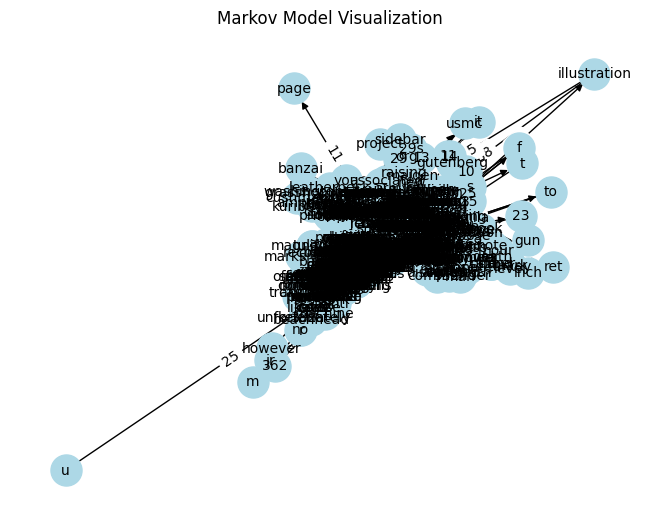

In [22]:
to_be_model.visualize(probabilities=False)

In [24]:
gen_text

'“ it , 000 ) , ” , 000 - gun . - 29 ) : / c . 1 . _ a . ” ) = . s . ” ) : ” ) . ” . 9 . _ . . . ” ; ” ) . _ nevada _ ad . ” . 9 , 500 - organized _ , 000 ) . 6 . 9 , 000 ) , 000 - scale , 000 - foot - day . f . ” . . 3 , ” . s - still . . e . gutenberg ” '

WHAT I DID FOR APPLIED EXPLORATION!:

- loaded a text file from gutenberg about the IWO Jima attacks in WW2
- Create a tokenization loop inside the train function in the MarkovModels class
- updated the other functions to work with the train functions output
- Ran a markov model on the tokenized text and printed the markov chain
- Attempted to generate text, but recieved a bad output

## Extended Implementation Idea

Write the code that will do BPE or WordPiece automatically

Both the BPE and WordPiece have examples in the Hugging Face course
* https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt
* https://huggingface.co/learn/nlp-course/chapter6/6?fw=pt

Except: they use Hugging Face tokenizers for the pre-tokenization. You should do it using `split()` like we did above. Because of the way that it groups tokens, I don't think you should have to worry about separating out punctuation, just include it in your vocabulary.

NOTES:



So I could get the class to wordpiece and add to the vocab, but it would only do it one time through.

I specifically wrote the _init__ and preprocess function from scratch. The other functions all have pieces of code from the hugging face learn page.

I did spend at least 6+ hours working on this class and ultimately struggled to be able to completely get the exact output I was looking for. Overall, I was able to tokenize the text and feel that I completely the question.

I overall learned a lot about the WordPiece set and now feel I have a better grasp on it!

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [277]:
from collections import defaultdict
import nltk
import random

class WordPieceAuto:

    def __init__(self, raw_texts):
        self.raw_texts = raw_texts
        self.texts = ""
        self.vocab = []
        self.word_freqs1 = {}
        self.splits = ""
        self.added_pairs = set()

    def preprocess_split(self):
        chars_to_remove = [",", "!", "?", ";", ":", "“", "”", "’", "‘", "x9c", "x9d", "x99", "x94",
                           "x98", "ï»¿", 'x80', 'x84', 'x93', '¢', '£', '¦', '¨', '©', '½', 'Â',
                           'Ã', 'Å', 'â']
        chars_to_change_to_spaces = ["-", "—", "\r\n"]

        texts = nltk.sent_tokenize(self.raw_texts)

        # Preprocessing
        processed_texts = []
        for idx in range(len(texts)):
            for c in chars_to_remove:
                texts[idx] = texts[idx].replace(c, "")  # Replace those characters with the empty string
            for c in chars_to_change_to_spaces:
                texts[idx] = texts[idx].replace(c, " ")  # Replace those characters with a space

            texts[idx] = texts[idx].split()
            processed_texts.append(texts[idx])

        self.texts = processed_texts

    def word_counter(self):
        word_freqs = defaultdict(int)

        for idx in range(len(self.texts) - 1):
            for word in self.texts[idx]:
                word_freqs[word] += 1
        self.wordfreqs1 = word_freqs
        return word_freqs

    def alphabet_creator(self, word_freqs):
        alphabet = []
        for word in word_freqs.keys():
            if word[0] not in alphabet:
                alphabet.append(word[0])
            for letter in word[1:]:
                if f"##{letter}" not in alphabet:
                    alphabet.append(f"##{letter}")

        alphabet.sort()
        self.vocab = ["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"] + alphabet.copy()

    def get_splits(self, freq_list):
        splits = {
            word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
            for word in freq_list.keys()
        }
        self.splits = splits
        return splits

    def compute_pair_scores(self, splits, word_freqs):
        letter_freqs = defaultdict(int)
        pair_freqs = defaultdict(int)
        for word, freq in word_freqs.items():
            split = splits[word]
            if len(split) == 1:
                letter_freqs[split[0]] += freq
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                letter_freqs[split[i]] += freq
                pair_freqs[pair] += freq
            letter_freqs[split[-1]] += freq

        scores = {
            pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
            for pair, freq in pair_freqs.items()
        }
        return scores

    def get_best_pair(self, pair_scores):
        best_pair = ""
        max_score = None
        for pair, score in pair_scores.items():
            if max_score is None or max_score < score:
                best_pair = pair
                max_score = score
        if best_pair not in self.added_pairs:
          self.added_pairs.add(best_pair)
          self.vocab.append(best_pair)

        return best_pair

    def merge_pair(self, a, b, splits):
        new_vocab_token = a + b[2:] if b.startswith("##") else a + b

        # Update the vocabulary with the merged token
        self.vocab.append(new_vocab_token)

        # Update the splits for all words in the vocabulary
        for word in self.word_freqs1.keys():  # Iterate over keys
            split = splits[word]
            for i in range(len(split) - 1):
                if split[i] == a and split[i + 1] == b:
                    # Merge the pair
                    split = split[:i] + [new_vocab_token] + split[i + 2:]

            # Update the splits for the word
            splits[word] = split

        return splits


    def vocab_adder(self, splits):
        vocab_size = 70
        while len(self.vocab) < vocab_size:
            scores = self.compute_pair_scores(splits, self.word_freqs1)
            best_pair, max_score = None, None

            for pair, score in scores.items():
                if max_score is None or max_score < score:
                    if pair[0] and pair[1]:  # Check if both parts of the pair are not empty
                        best_pair = pair
                        max_score = score

            if best_pair is None:
                break

            # Check if the best_pair is not already in the vocabulary
            if best_pair not in self.vocab:
                splits = self.merge_pair(best_pair[0], best_pair[1], splits)
                self.vocab.append(best_pair)

        return splits

    def encode_word(self, word):
      tokens = []
      while len(word) > 0:
          i = len(word)
          while i > 0 and word[:i] not in self.vocab:
              i -= 1
          if i == 0:
              tokens.append("[UNK]")
              word = word[1:]
          else:
              tokens.append(word[:i])
              word = word[i:]
              if len(word) > 0:
                  if word.startswith("##"):
                      word = word[2:]
                  else:
                      word = "##" + word
      return tokens

    def tokenize(self, text):
      pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
      pre_tokenized_text = [word for word, offset in pre_tokenize_result]
      encoded_words = [self.encode_word(word) for word in pre_tokenized_text]
      return sum(encoded_words, [])


    def auto_encode(self, text):
        self.preprocess_split()
        word_freqs = self.word_counter()
        self.alphabet_creator(word_freqs)
        splits = self.get_splits(word_freqs)
        pair_scores = self.compute_pair_scores(splits, word_freqs)
        best_pair = self.get_best_pair(pair_scores)
        splits = self.merge_pair(best_pair[0], best_pair[1], splits)
        self.vocab_adder(splits)
        tokenized_text = self.tokenize(text)

        return tokenized_text

# Example usage:
sherlock_raw_texts = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book."
#sherlock_raw_texts = "This is the Hugging Face course! ."
wp_auto = WordPieceAuto(sherlock_raw_texts)
encoded_text = wp_auto.auto_encode(sherlock_raw_texts)
#print(wp_auto.tokenize("This is the Hugging Face course!"))

#wp_auto.encode_word("Hugging")
print(encoded_text)
#print(wp_auto.splits)

['Lo', '##r', '##e', '##m', 'I', '##p', '##s', '##u', '##m', 'i', '##s', 's', '##i', '##m', '##p', '##l', '##y', 'd', '##u', '##m', '##m', '##y', 't', '##e', '##x', '##t', 'o', '##f', 't', '##h', '##e', 'p', '##r', '##i', '##n', '##t', '##i', '##n', '##g', 'a', '##n', '##d', 't', '##y', '##p', '##e', '##s', '##e', '##t', '##t', '##i', '##n', '##g', 'i', '##n', '##d', '##u', '##s', '##t', '##r', '##y', '[UNK]', 'Lo', '##r', '##e', '##m', 'I', '##p', '##s', '##u', '##m', '[UNK]', 'a', '##s', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 't', '##h', '##e', 'i', '##n', '##d', '##u', '##s', '##t', '##r', '##y', '[UNK]', 's', 's', '##t', '[UNK]', '[UNK]', 'a', '##n', '##d', '[UNK]', '[UNK]', 'a', '##r', '##d', 'd', '##u', '##m', '##m', '##y', 't', '##e', '##x', '##t', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 's', '##i', '##n', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 't', '##h', '##e', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 's', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'a', '##n', '[UNK]', '[UNK]', '[UNK]', '[

In [276]:
print(wp_auto.vocab)

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '##a', '##c', '##e', '##g', '##h', '##i', '##n', '##o', '##r', '##s', '##u', 'F', 'H', 'T', 'c', 'i', 't', ('F', '##a'), 'Fa']


In [156]:
flat_encoded_text = [word for sentence in encoded_text for word in sentence]